# Level 0

In [1]:
# Write a loop to sum the even numbers from 1 to 100.
odd_sum = 0
for i in range(101):
    if i % 2 == 0:
        odd_sum += i
print odd_sum        

2550


In [2]:
# Sum the even numbers 1 to 100 without a loop
import numpy as np
odd_sum = 0
A = np.array(range(0,101))
A_plus1_mod2 = (A + 1) % 2
print sum(A * A_plus1_mod2)

2550


In [3]:
# Write a function to return the sum of its arguments, and call it
def sum_two(x, y):
    return x + y
print sum_two(2, 2)

4


# Level 1

### Use SKlearn to load a dataset, and display it on the screen

In [4]:
from sklearn import datasets, metrics, model_selection, linear_model
from matplotlib import pyplot as plt
% matplotlib inline
import pandas as pd

In [5]:
bc = datasets.load_breast_cancer()
bc_df = pd.DataFrame(bc.data)
bc_df.columns = bc.feature_names
bc_df['type'] = bc.target
bc_df.head()
# print bc_df.loc[bc_df['type'] == 1].shape[0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Use SKlearn to build a logistic regression model, then train it.

In [6]:
# SGD Classifier with 'log' loss parameter - logistic regression with SGD
log_reg_clf = linear_model.SGDClassifier(loss='log', learning_rate='optimal')
log_reg_clf.fit(bc.data, bc.target)

D:\Anaconda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Plot the testing performance of a logistic regression for different learning rates.

In [7]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(bc.data, bc.target, test_size = 0.2, random_state=1)

## VERY IMPORTANT TO NORMALIZE DATA

In [8]:
from sklearn.preprocessing import Normalizer

In [9]:
scaler = Normalizer().fit(bc.data)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Learning rate with the highest accuracy: 0.5
Maximal accuracy: 0.9473684210526315


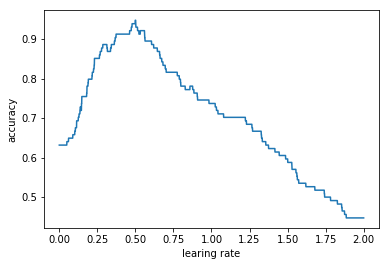

In [10]:
learning_rate_range = np.arange(0.001, 2, 0.001) # interval for finding best learning rate
test_accs = []
# fit models with different learning rates and check log-loss rates
for lr in learning_rate_range:
    log_reg_clf = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0 = lr, random_state=1)
    log_reg_clf.fit(X_train_norm, y_train)
    test_acc = log_reg_clf.score(X_test_norm, y_test)
    test_accs.append(test_acc)
# plot dependence of log loss rate and learning rate value    
plt.plot(learning_rate_range, test_accs)
plt.xlabel('learing rate')
plt.ylabel('accuracy')


best_lr = round(learning_rate_range[test_accs.index(max(test_accs))], 4) # learning rate with the max accuracy
print 'Learning rate with the highest accuracy: ' + str(best_lr)
print 'Maximal accuracy: ' + str(max(test_accs))

# Level 2

### Plot the train/test errors of a logistic regression, as the number of epochs increase

In [11]:
# Function for singular epoch train returning train and test errors
def train_epoch(X_train, X_test, y_train, y_test, classifier):    
    classifier.fit(X_train, y_train)
    train_err = metrics.log_loss(y_train, classifier.predict_proba(X_train))
    test_err = metrics.log_loss(y_test, classifier.predict_proba(X_test))
    return train_err, test_err

In [12]:
# Function for training a model during number of epoch, returns list of train/test errors
def train_model(X_train, X_test, y_train, y_test, classifier, num_epochs=1):
    train_errs = []
    test_errs = []
    classifier.warm_start = True
    for epoch in range(num_epochs):
        train_err, test_err = train_epoch(X_train, X_test, y_train, y_test, classifier)
        train_errs.append(train_err)
        test_errs.append(test_err)
    return train_errs, test_errs    

In [13]:
# 10 epoch training and testing
num_epochs = 10
# Log reg with True warm_state - allows continue train model when fit method is called
clf = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=best_lr, random_state=1, warm_start=True)
train_errors, test_errors = train_model(X_train_norm, X_test_norm, y_train, y_test, clf, num_epochs)

[0.4219152844268813, 0.3648720070802563, 0.3385973143561213, 0.3227314903933767, 0.31195562728535703, 0.3041727009204968, 0.2983500147041473, 0.2938988019286287, 0.2904474833599203, 0.2877446305085555]


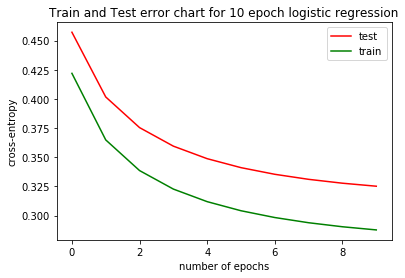

In [14]:
print train_errors
plt.plot(test_errors,'r', label ='test')
plt.plot(train_errors, 'g', label='train')
plt.xlabel('number of epochs')
plt.ylabel('cross-entropy')
plt.title('Train and Test error chart for 10 epoch logistic regression')
plt.legend()
plt.show()

### Plot the train/test error over 10 repeats, shuffling the data each time, with error bars

In [15]:
num_experiments = 10

for experiment in range(num_experiments):
    clf = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=best_lr, random_state=1, warm_start=True)
    # shuffle test and train datasets
    train_shuffle_indexes = np.random.permutation(y_train.size)
    test_shuffle_indexes = np.random.permutation(y_test.size)
    X_train_shuffled = X_train_norm[train_shuffle_indexes]
    y_train_shuffled = y_train[train_shuffle_indexes]
    X_test_shuffled = X_test_norm[test_shuffle_indexes]
    y_test_shuffled = y_test[test_shuffle_indexes]
    # train model during 10 epochs and get errors on train/test dataset for each epoch
    train_errors, test_errors = train_model(X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled, clf, num_epochs)
    # initialize DataFrame and put first column with the results
    if experiment == 0:
        train_errors_exp = pd.DataFrame(train_errors)
        test_errors_exp = pd.DataFrame(test_errors)
    # append column to the DataFrame
    else:
        train_errors_exp[experiment] = train_errors
        test_errors_exp[experiment] = test_errors

In [16]:
train_errors_exp

,0,1,2,3,4,5,6,7,8,9
0,0.508794,0.394998,0.428362,0.391796,0.388916,0.402493,0.525801,0.398595,0.464369,0.386912
1,0.415332,0.329801,0.366973,0.337801,0.332818,0.349565,0.416518,0.330293,0.385903,0.326825
2,0.374311,0.303058,0.337691,0.315153,0.308925,0.326975,0.370629,0.302511,0.354716,0.301409
3,0.351930,0.288689,0.321159,0.302419,0.295588,0.314082,0.345848,0.287788,0.338423,0.287487
4,0.338332,0.279881,0.310877,0.294195,0.287172,0.305745,0.330675,0.278838,0.328682,0.278851
5,0.329527,0.274066,0.304076,0.288478,0.281493,0.299992,0.320663,0.272952,0.322383,0.273105
6,0.323586,0.270042,0.299384,0.284331,0.277500,0.295864,0.313727,0.268885,0.318099,0.269110
7,0.319456,0.267168,0.296049,0.281241,0.274614,0.292825,0.308760,0.265982,0.315083,0.266250
8,0.316520,0.265067,0.293623,0.278899,0.272484,0.290544,0.305116,0.263859,0.312905,0.264157
9,0.314396,0.263504,0.291828,0.277100,0.270888,0.288807,0.302393,0.262279,0.311299,0.262601


In [17]:
train_means = []
test_means = []
train_stds = []
test_stds = []
for line in range(num_experiments):
    train_means.append(train_errors_exp.iloc[line].mean())
    test_means.append(test_errors_exp.iloc[line].mean())
    train_stds.append(train_errors_exp.iloc[line].std())
    test_stds.append(test_errors_exp.iloc[line].std())
    
test_stdx2 = [x * 2 for x in test_stds] 
train_stdsx2 = [x* 2 for x in train_stds]

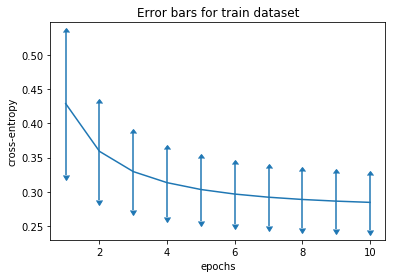

In [18]:
x = np.arange(1,11)
plt.errorbar(x, train_means, yerr=train_stdsx2, uplims=True, lolims=True)
plt.ylabel('cross-entropy')
plt.xlabel('epochs')
plt.title('Error bars for train dataset')
plt.show()

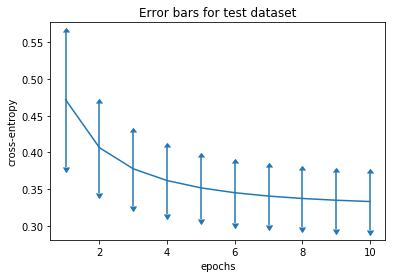

In [19]:
x = np.arange(1,11)
plt.errorbar(x, test_means, yerr=test_stdx2, uplims=True, lolims=True)
plt.ylabel('cross-entropy')
plt.xlabel('epochs')
plt.title('Error bars for test dataset')
plt.show()

## Implement cross-validation to identify a good learning rate for the logistic regression

In [28]:
# generator, returning value is a pair of train indexes and test indexes lists for the appropriate iteration or Fold
def cross_validation(data, num_splits):
    num_el = data.shape[0]
    indexes = np.arange(0, num_el)
    # number of element in each split
    el_in_split = num_el / num_splits
    cross_val_inds = []
    # split indexes into num_splits pieces
    if num_el % num_splits != 0:
        for i in range (0, num_el - 2 * el_in_split, el_in_split):
            cross_val_inds.append(indexes[i:i + el_in_split])
        cross_val_inds.append(indexes[i + el_in_split:])   
    else:
        for i in range (0, num_el, el_in_split):
             cross_val_inds.append(indexes[i:i + el_in_split])
    # convert lists to array
    cross_val_inds = np.array(cross_val_inds)
    result = []
    # loop iterating over splits number
    for i in range(num_splits):
        # test inds - the i-th index array
        test_inds = cross_val_inds[i]
        # merge all arrays into one
        train_inds = np.concatenate(cross_val_inds).astype(None)
        # remove test indexes from train indexes
        train_inds = [x for x in train_inds if x not in test_inds]
        # convert to int and to np.array
        train_inds = [int(x) for x in train_inds]
        train_inds = np.array(train_inds)
        # generator which return next pair of train and test indexes every iteration 
        yield train_inds, test_inds    

In [30]:
# values of learning rates
learning_rate_range = np.arange(0.05, 2, 0.05)
# flag switching when DataFrame will be created
dataframe_init_flag = False
# DataFrame row counter
count = 1
# shuffle data and target before cross-validation
shuffle_indexes = np.random.permutation(bc.data.shape[0])
bc.data = bc.data[shuffle_indexes]
bc.target = bc.target[shuffle_indexes]

# number of dataset splits
num_fold = 5

# loop for learning rates with inner loop for cross val folds
for lr in learning_rate_range:
    # list for accuracies for diferent folds
    accs = []
    # call two lists from generator: train and test inds
    for train_ind, test_ind in cross_validation(bc.data, num_fold):
        # logistic regression with SGD learning algorithm, learning rate = lr
        clf = linear_model.SGDClassifier(loss='log', random_state=1, learning_rate='constant', eta0=lr)
        # variables with train/test data/labels
        data_train = bc.data[train_ind]
        labels_train = bc.target[train_ind]
        data_test = bc.data[test_ind]
        labels_test = bc.target[test_ind]
        # normalizing train and test data
        scaler = Normalizer().fit(data_train)
        data_train_norm = scaler.transform(data_train)
        data_test_norm = scaler.transform(data_test)
        # train the model
        clf.fit(data_train_norm, labels_train)
        # put accuracy of the predictions on test data to accs list
        accs.append(clf.score(data_test_norm, labels_test))
    # prepare array to the DataFrame
    list_to_df = np.array(lr)
    list_to_df = np.append(list_to_df, np.array(accs))
    # initialize DataFrame and put first row
    if not dataframe_init_flag:  
        acc_df = pd.DataFrame(list_to_df).T
        dataframe_init_flag = True
    # put next rows into the DF
    else:
        acc_df.loc[count] = list_to_df
        count += 1

# create column names
col_names = []
for col in range(acc_df.shape[1]):
    if col == 0:
        col_names.append('learning rate')
    else:
        col_names.append('accuracy fold ' + str(col))
acc_df.columns = col_names


In [31]:
acc_df

,learning rate,accuracy fold 1,accuracy fold 2,accuracy fold 3,accuracy fold 4,accuracy fold 5
0,0.05,0.557522,0.637168,0.601770,0.707965,0.786325
1,0.10,0.566372,0.654867,0.663717,0.752212,0.888889
2,0.15,0.601770,0.681416,0.690265,0.761062,0.897436
3,0.20,0.601770,0.681416,0.707965,0.796460,0.897436
4,0.25,0.628319,0.707965,0.743363,0.796460,0.897436
5,0.30,0.637168,0.725664,0.752212,0.805310,0.897436
6,0.35,0.681416,0.734513,0.787611,0.814159,0.897436
7,0.40,0.707965,0.752212,0.787611,0.814159,0.897436
8,0.45,0.734513,0.761062,0.814159,0.831858,0.897436
9,0.50,0.743363,0.769912,0.840708,0.840708,0.897436


In [32]:
# count means and std and append them to appropriate lists
means = []
stds = []
for line in range(acc_df.shape[0]):
    means.append(acc_df.loc[line][1:].mean())
    stds.append(acc_df.loc[line][1:].std())

stdsx2 = [x * 2 for x in stds]

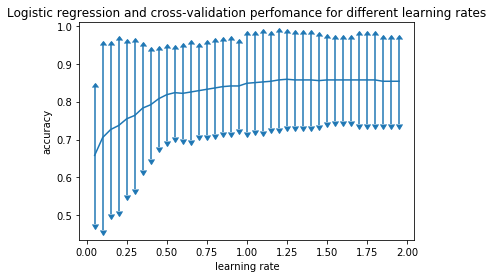

In [33]:
plt.errorbar(learning_rate_range, means, yerr=stdsx2, uplims=True, lolims=True)
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.title('Logistic regression and cross-validation perfomance for different learning rates')
plt.show()

In [34]:
print 'Highest average perfomance:', round(max(means), 3)
print 'Best learning rate:', round(learning_rate_range[means.index(max(means))], 3)

Highest average perfomance: 0.859
Best learning rate: 1.25


## Implement your own decision stump and evaluate it

In [35]:
# create 2 class dataset with 2 features, 30 samples
centers = [(-3, -3), (3, 3)]
X, y = datasets.make_blobs(n_features=2, n_samples=100, centers=centers, cluster_std=1, random_state=1)

In [36]:
df = pd.DataFrame(X)
df['label'] = y
df.columns = ['x1', 'x2', 'label']
df.head()

,x1,x2,label
0,-3.528172,-4.072969,0
1,2.889553,2.382638,1
2,3.520576,1.855659,1
3,2.819080,2.396079,1
4,5.190700,1.103639,1


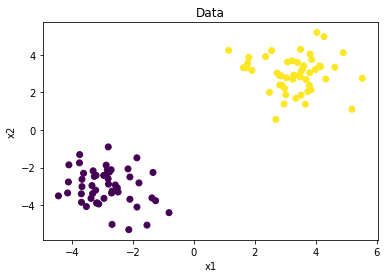

In [37]:
fig = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [38]:
# function returns number of errors for x = t in decision stump
def count_errors(data, labels, t):
    errors = 0
    for i in range(data.shape[0]):
        if data[i, 0] < t:
            answer = 0
        else:
            answer = 1
        if answer != labels[i]:
            errors += 1
    return errors    

# implementation of the decision stump
def decision_stump(data, labels, stepsize=1, min_err=99999):
    t = min(data[:, 0])
    finish = max(data[:, 1])
    t_best = t
    while t < finish:
        num_errs = count_errors(data, labels, t)
        if num_errs < min_err:
            min_err = num_errs
            t_best = t
        t += stepsize  
    return t_best        

In [39]:
t = decision_stump(X, y,stepsize=0.5)
print t

-0.44411380542958945


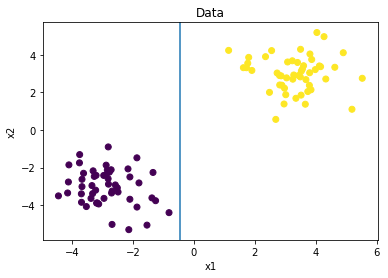

In [40]:
fig = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axvline(t)
plt.show()